<a href="https://colab.research.google.com/github/greapis/Python_practice/blob/main/Pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn

In [25]:
train_dataset = datasets.MNIST(root='data', train=True, download=True)
test_dataset = datasets.MNIST(root='data', train=False, download=True)

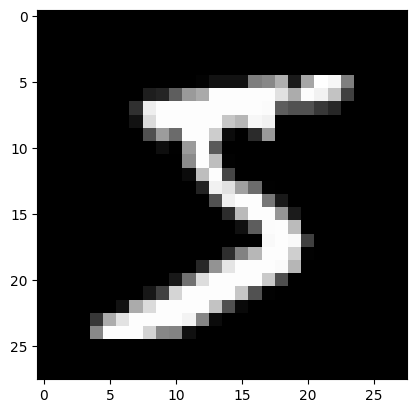

label:  5


In [26]:
image, label = train_dataset[0]
plt.imshow(image, cmap='gray')
plt.show()
print('label: ', label)

In [27]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [28]:
batch_size = 100

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}')

Device: cpu


In [29]:
input_size = 28*28
output_size = 10

In [30]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear(out)
    return out

In [31]:
model = NeuralNet().to(device)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
def train(train_dataloader, model, loss_fn, optimizer):
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch%100==0:
      loss = loss.item()
      print(f"loss: {loss}, batch: {batch}")

In [33]:
def test(test_dataloader, model, loss_fn):
  size = len(test_dataloader, dataset)
  num_batches = len(test_dataloader)
  test_loss, correct =0, 0

  with torch.no_grad():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)

      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss/=num_batches
  correct/=size
  print(f"Test Error: \n Accuracy: {(100*correct): 0.1f}%, Avg loss: {test_loss:>8f} \n")

In [39]:
epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}|\n-------------------------------")
  # train(train_dataloader, model, loss_fn, optimizer)
  # test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1|
-------------------------------
Epoch 2|
-------------------------------
Epoch 3|
-------------------------------
Epoch 4|
-------------------------------
Epoch 5|
-------------------------------
Epoch 6|
-------------------------------
Epoch 7|
-------------------------------
Epoch 8|
-------------------------------
Epoch 9|
-------------------------------
Epoch 10|
-------------------------------
Done!


In [41]:
real_test_dataset = datasets.MNIST(root='data', train=False, download=True)
rand = random.randint(0, 9999)
X, y = test_dataset[rand][0], test_dataset[rand][1]
A = real_test_dataset[rand][0]

with torch.no_grad():
  pred = model(X)
  predicted, actual = pred[0].argmax(0), y
  plt.imshow(A, cmap='gray')
  plt.show()
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

NameError: name 'random' is not defined